<a href="https://colab.research.google.com/github/BadilloJerahmeel/CCST102-CS3B/blob/main/3B_Badillo_EXER1(Multiple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration and visualization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


*  **Loading dataset**

In [ ]:
data = pd.read_csv('datasets_house_prices.csv')
data.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


*  **Visualize the data using scatter plots, histograms, and correlation matrices to identify potential patterns and relationships.**

In [ ]:
print(data.describe())

       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2.000000    22.000000                       8.475528   
50%    2430.500000     3.000000    47.000000                      15.239628   
75%    3254.250000     4.000000    74.000000                      22.765188   
max    3997.000000     5.000000    99.000000                      29.935715   

              Price  
count  1.000000e+03  
mean   7.190532e+05  
std    2.789818e+05  
min    2.159455e+05  
25%    4.789045e+05  
50%    7.128781e+05  
75%    9.680664e+05  
max    1.212350e+06  


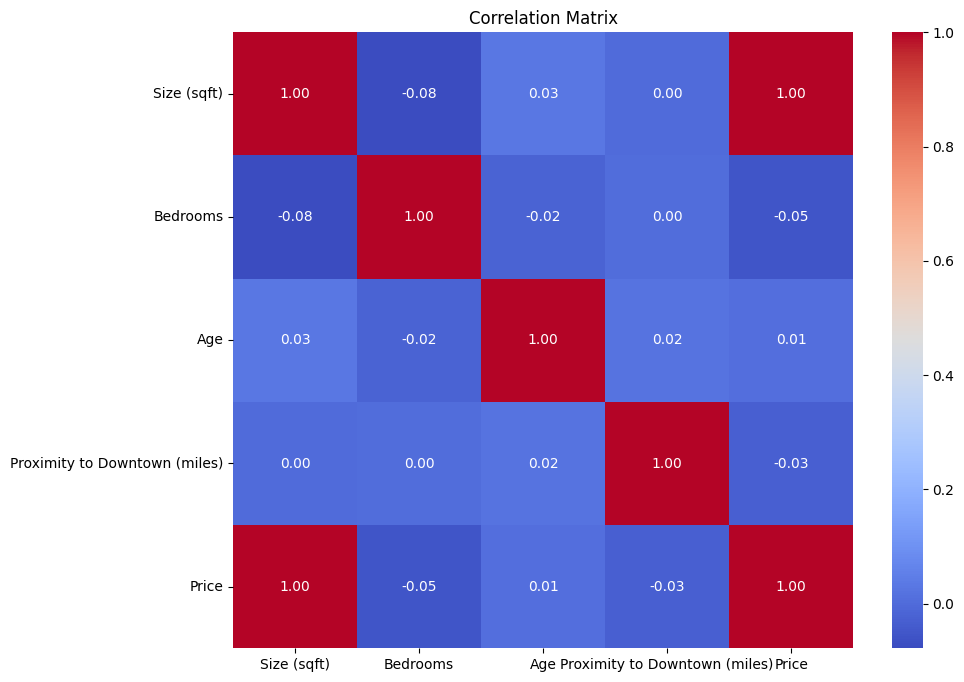

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:

print(data.columns)


Index(['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)',
       'Price'],
      dtype='object')


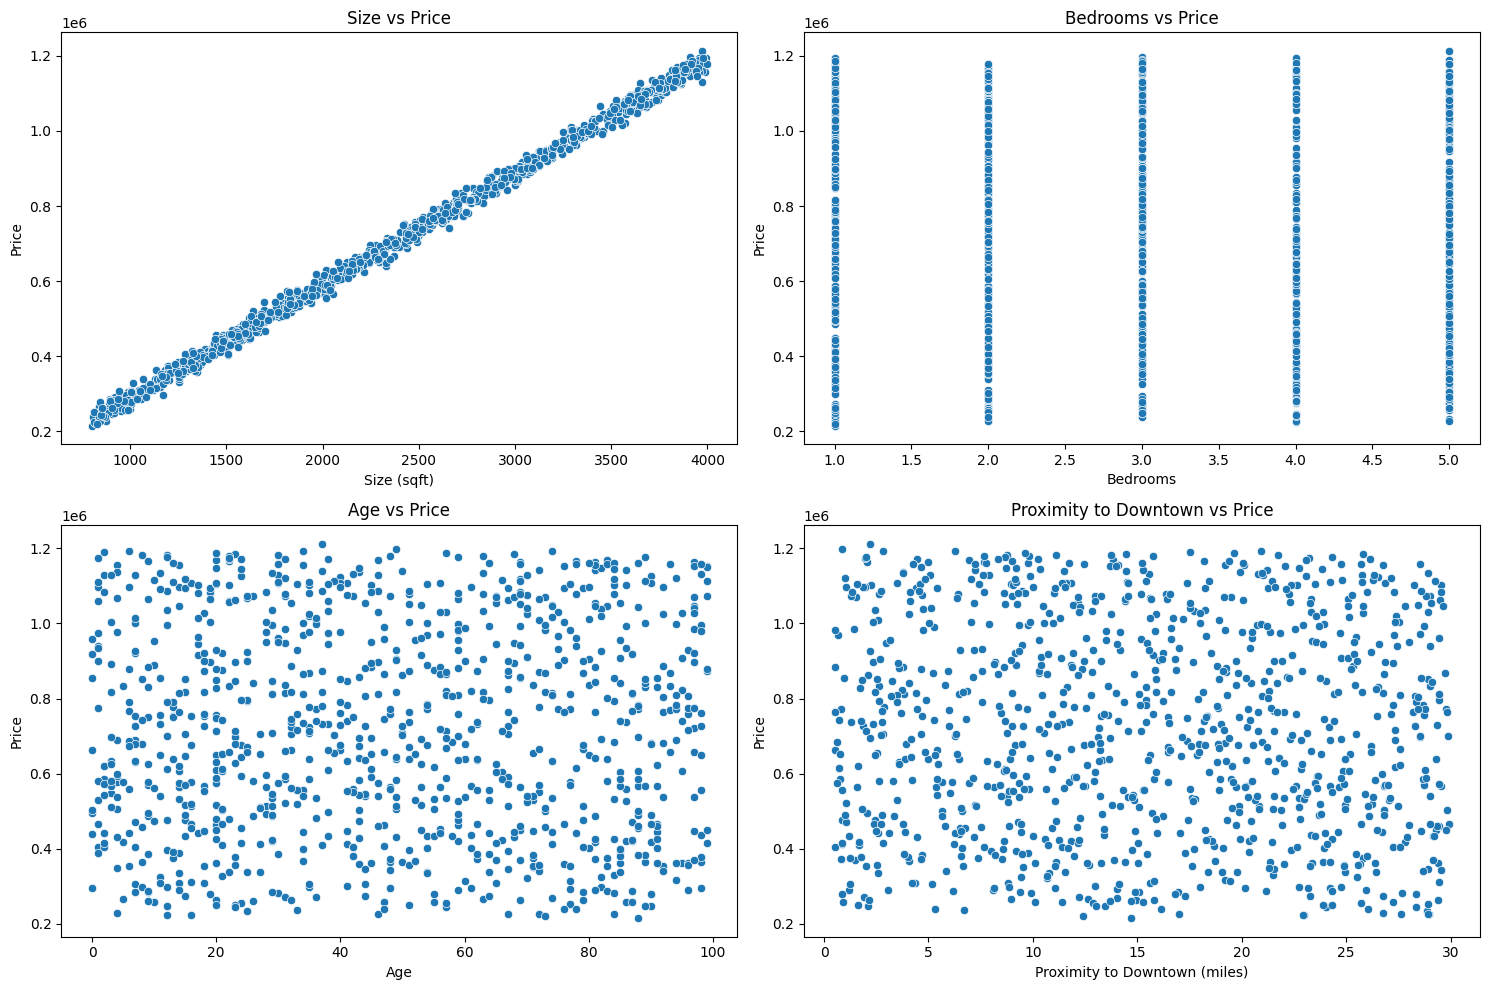

In [ ]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Size (sqft)', y='Price', data=data)
plt.title('Size vs Price')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Bedrooms', y='Price', data=data)
plt.title('Bedrooms vs Price')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Price', data=data)
plt.title('Age vs Price')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Proximity to Downtown (miles)', y='Price', data=data)
plt.title('Proximity to Downtown vs Price')

plt.tight_layout()
plt.show()


# **Data Preprocessing**

*  **Handling missing data**

In [ ]:

print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


*  **Normalize or standardize the data**

In [ ]:
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = data['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Model development**

*  **Train-Test Split and Model Training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']
coefficients = model.coef_

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(coef_df)

                         Feature    Coefficient
0                    Size (sqft)  278975.285938
1                       Bedrooms    6804.519001
2                            Age   -6082.939258
3  Proximity to Downtown (miles)   -8459.853956


# **Model Evaluation**

*  **Evaluate Model Performancet**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 100214724.63128743
R-squared: 0.9986314443568995


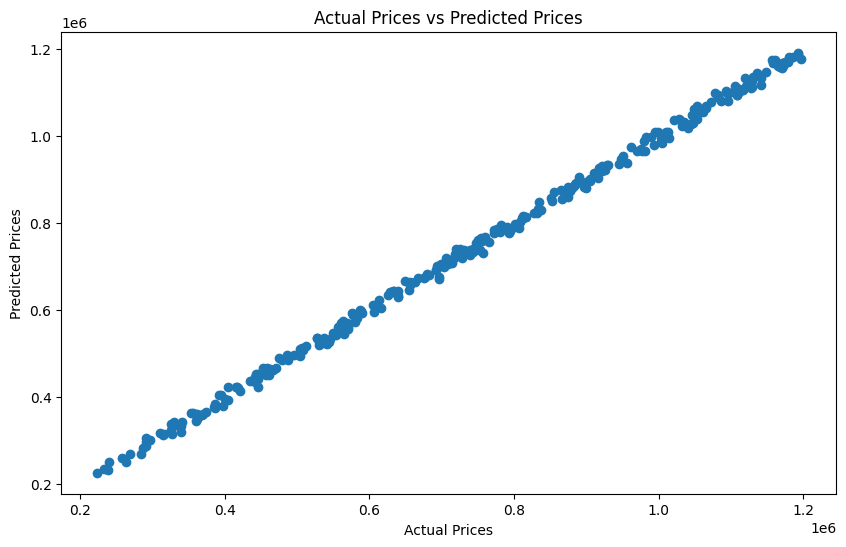

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()